no display found. Using non-interactive Agg backend


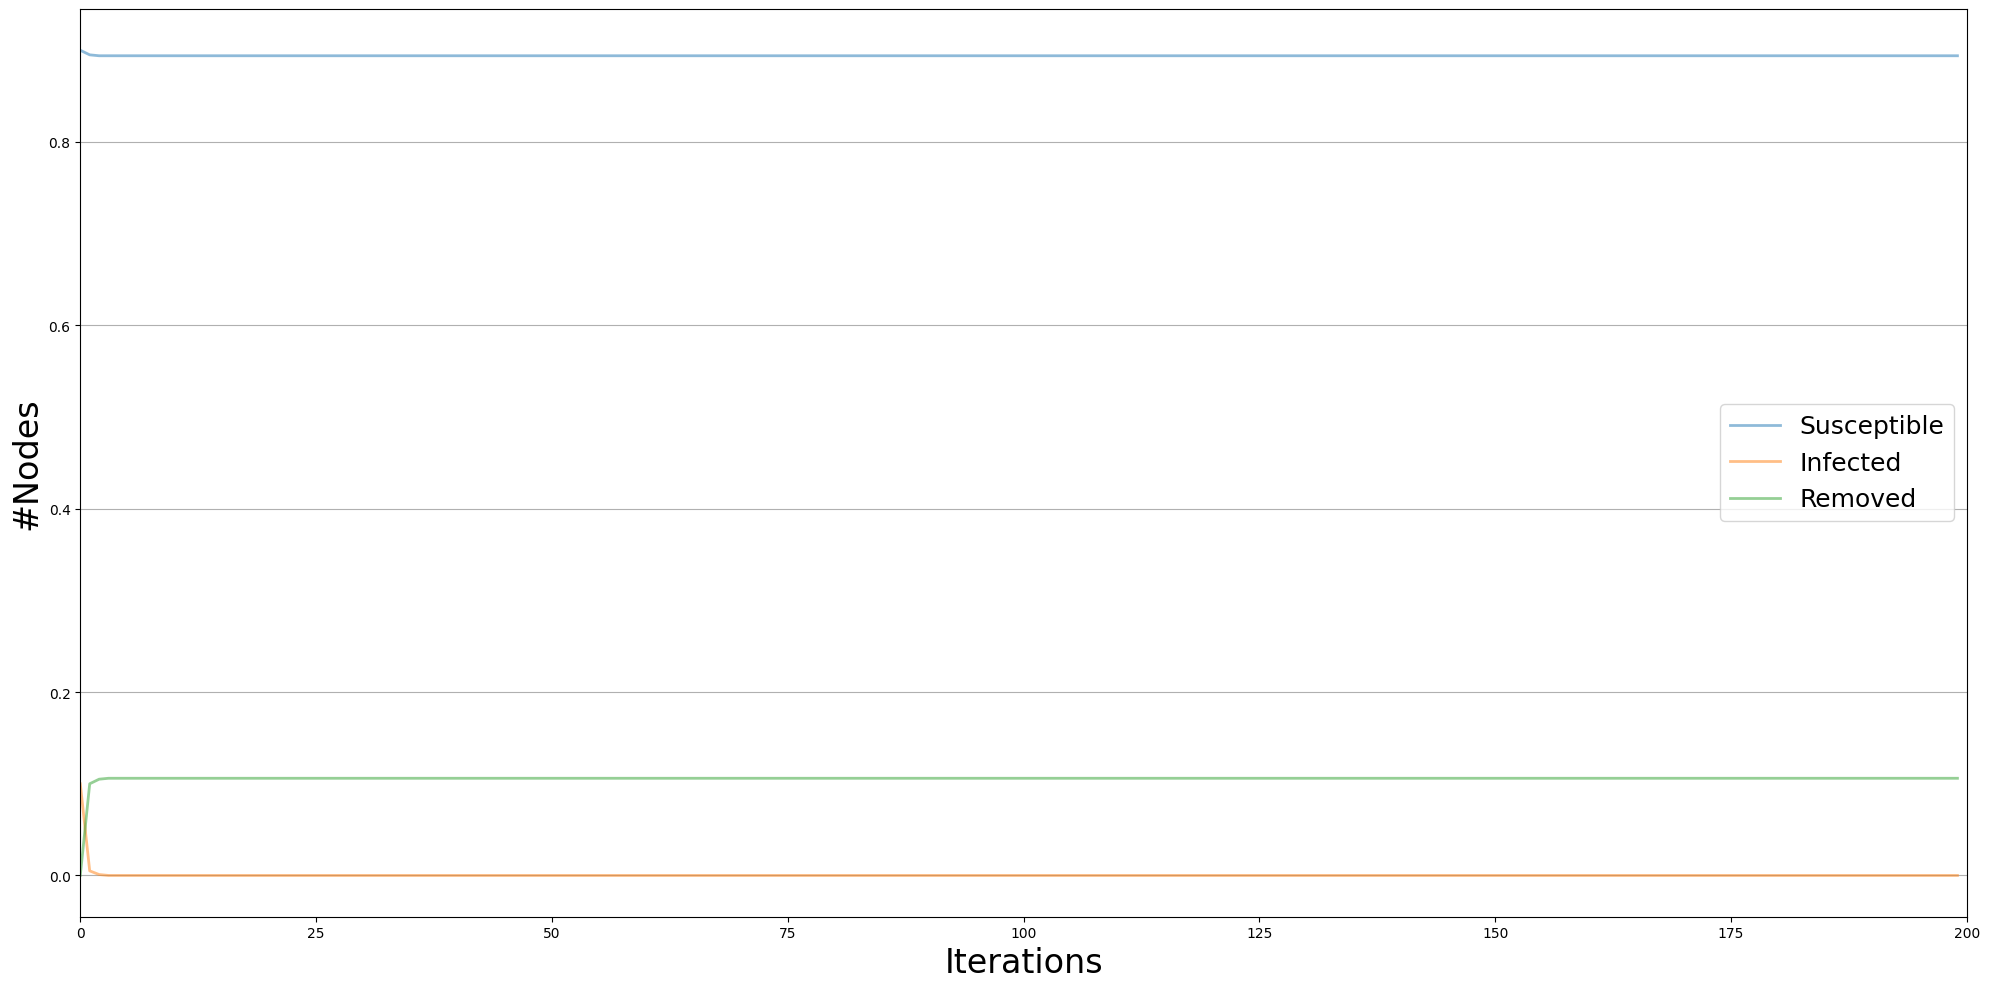

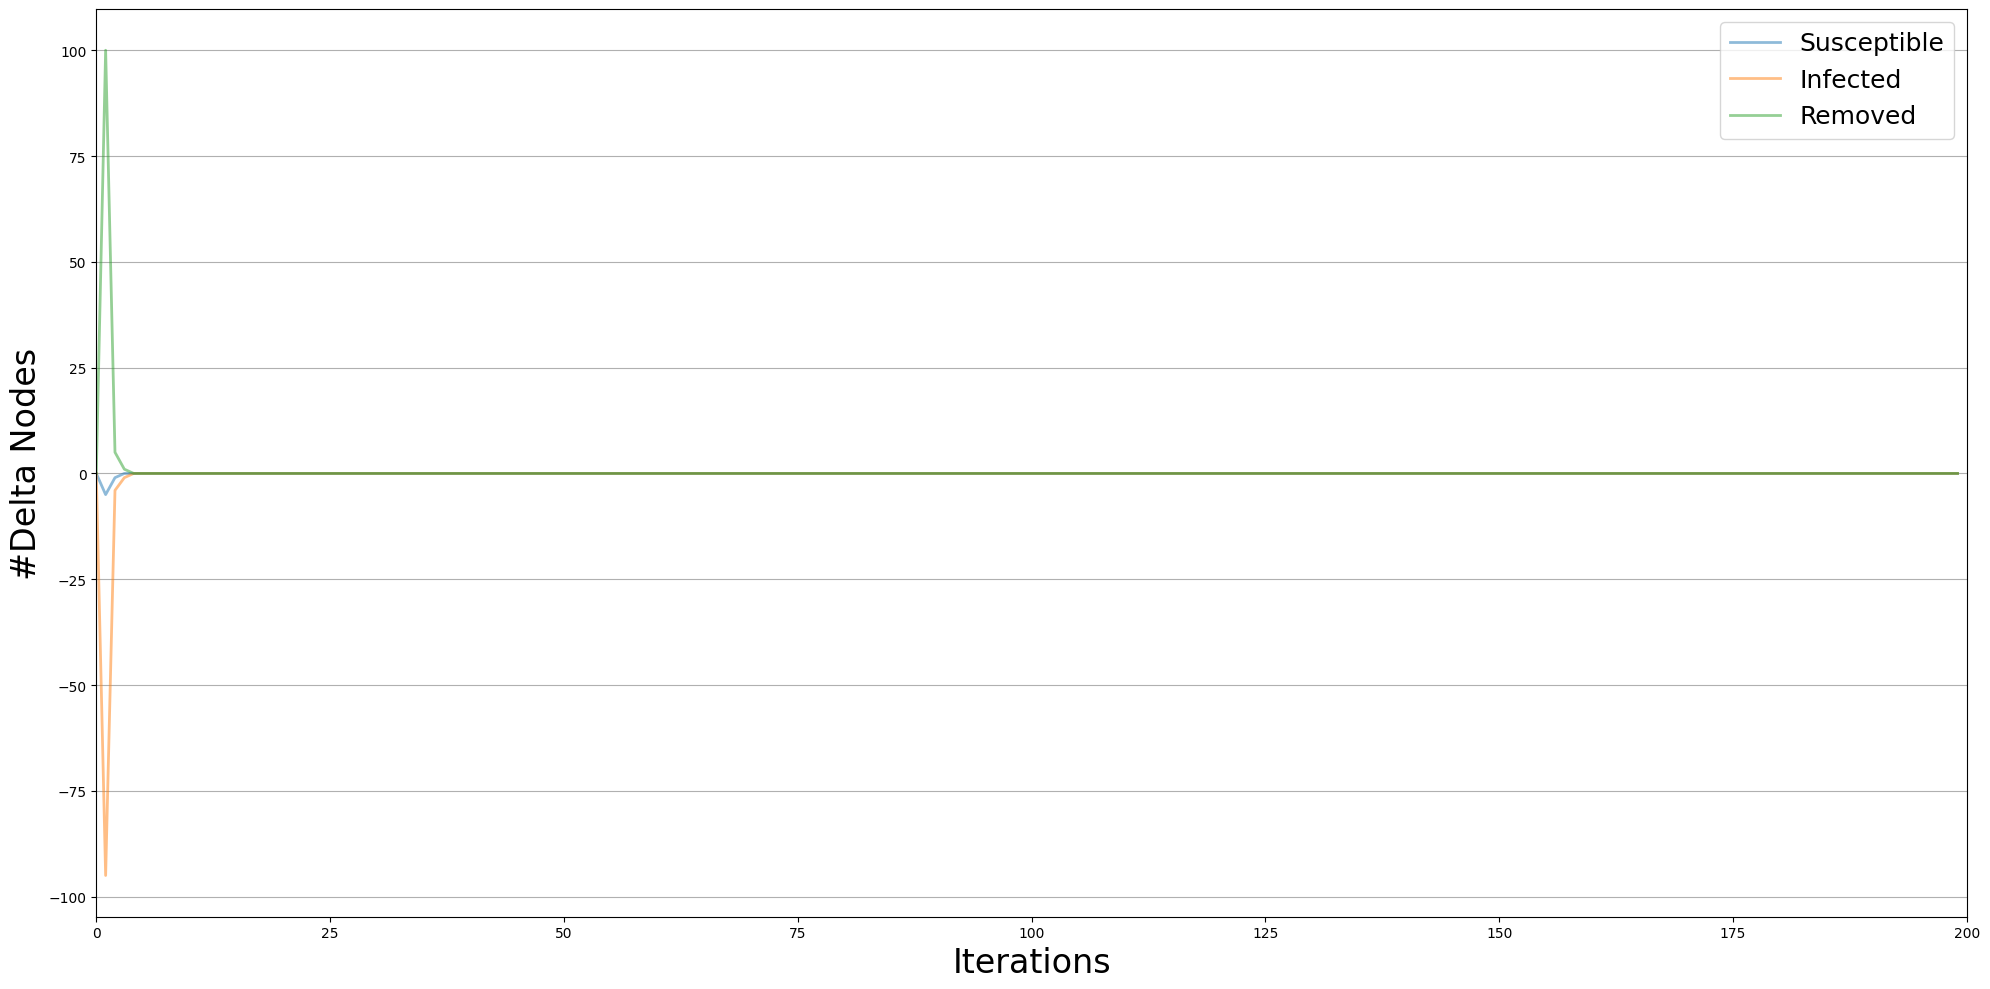

In [5]:
'''
Independent Cascades Model with Community Embeddedness

This model is a variation of the well-known Independent Cascade (IC), and it is designed to embed community awareness into the IC model. The probability p(u,v) of the IC model is replaced by the edge embeddedness.

See documentation...

The ICE model starts with an initial set of active nodes A0; the diffusive process unfolds in discrete steps according to the following randomized rule:

When node v becomes active in step t, it is given a single chance to activate each currently inactive neighbor u. If v and u belong to the same community, it succeeds with a probability eu,v
; otherwise with probability min{ez,v|(z,v)∈E}
.
If u has multiple newly activated neighbors, their attempts are sequenced in an arbitrary order.
If v succeeds, then u will become active in step t + 1; but whether or not v succeeds, it cannot make any further attempts to activate u in subsequent rounds.
The process runs until no more activations are possible

Statuses:
    - 0: Susceptible
    - 1: Infected
    - 2: Removed

Domande:
- Stessa dell'ICP
'''

import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
import random
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence

# Network topology
g = nx.erdos_renyi_graph(1000, 0.1)

# Model selection
model = ep.ICEModel(g)

# Model Configuration
config = mc.Configuration()
config.add_model_parameter('fraction_infected', 0.1)

communities = {}
for node in range(1000):
    communities[node] = 'comunity' + str(random.randint(1, 10))
for node in g.nodes():
    config.add_node_configuration("com", node, communities[node])

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(200)
trends = model.build_trends(iterations)

%matplotlib inline
viz = DiffusionTrend(model, trends)
viz.plot()
viz = DiffusionPrevalence(model, trends)
viz.plot()
